<a href="https://colab.research.google.com/github/fsconrado/MScript1/blob/main/Algoritmo_Mestrado_Conrado_Definitivo_ipynb(AGESEXBIOMARCADORES).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Cenário 3:**{ Biomarcadores com Idade e Sexo | Dados Não balanceados}
---

# **Visão dos Dados - 

In [138]:
#1. IMPORTAR O DATASET (COLUNAS IMPORTANTES: AGE, SEX, LYVE1, REG1B, TFF1 ==> ALVO PREVER A COLUNA STAGE.3)
#!pip install plotly --upgrade
#Baixar os dados e jogar na variável DADOS
import pandas as pd

dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")
dados = dados.fillna(1, inplace= False)
# 16 colunas


In [139]:
dados

,sample_id,patient_cohort,sample_origin,diagnosis,stage,sex,age,LYVE1,REG1B,TFF1,creatinine,plasma_CA19_9,REG1A,stage2
0,S497,Cohort1,ESP,3,I,F,81,12.017150,431.422530,874.099700,0.56550,1.0,1.000,I
1,S456,Cohort1,LIV,3,IA,M,57,2.628425,40.620818,529.984000,1.73043,10.0,155.270,I
2,S520,Cohort1,BPTB,3,IA,M,55,2.830541,33.406150,323.175770,0.47502,11.0,210.185,I
3,S573,Cohort2,BPTB,3,IA,M,58,0.632433,188.253000,138.630000,0.44109,11.0,1.000,I
4,S401,Cohort1,LIV,3,IB,M,73,12.245820,196.921830,1529.183124,0.70122,3236.0,432.917,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,S549,Cohort2,BPTB,3,IV,M,68,7.058209,156.241000,525.178000,0.52026,1.0,1.000,IV
195,S558,Cohort2,BPTB,3,IV,F,71,8.341207,16.915000,245.947000,0.85956,1.0,1.000,IV
196,S560,Cohort2,BPTB,3,IV,M,63,7.674707,289.701000,537.286000,1.36851,1.0,1.000,IV
197,S583,Cohort2,BPTB,3,IV,F,75,8.206777,205.930000,722.523000,1.33458,1.0,1.000,IV


In [140]:
#Avaliar o número de amostras para cada classe(estadiamento)
import numpy as np
np.unique(dados['stage2'], return_counts = True)

(array(['I', 'II', 'III', 'IV'], dtype=object), array([16, 86, 76, 21]))

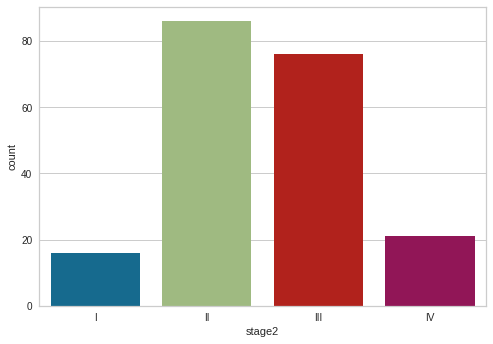

In [141]:
#Gerar um gráfico para avaliar visualmente o número de amostras para cada classe, objetivo é avaliar se os dados estão balanceados.
import seaborn as sns
sns.countplot(x = dados['stage2']);

# **C3-01. KnnClassifier**{*Unbalanced*} => 0.425

In [142]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
X_dados

#Onehot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_dados)
X_dados

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)


#Separação dos dados SEM o balanceamento
from sklearn.model_selection import train_test_split

X_dados_train , X_dados_test, y_dados_train, y_dados_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=0)
X_dados_train.shape, X_dados_test.shape


((159, 9), (40, 9))

In [143]:
#KNN CLASSIFICADOR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [144]:
knn_modelc = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 3)
knn_modelc.fit(X_dados_train, y_dados_train)

KNeighborsClassifier(p=3)

In [145]:
previsoes = knn_modelc.predict(X_dados_test)
previsoes1 = previsoes
yprev1train = y_dados_test 

In [146]:
y_dados_test

array(['II', 'III', 'III', 'II', 'III', 'IV', 'I', 'III', 'I', 'III',
       'II', 'III', 'III', 'III', 'II', 'I', 'II', 'III', 'II', 'II',
       'III', 'III', 'II', 'III', 'II', 'III', 'IV', 'IV', 'II', 'II',
       'II', 'II', 'II', 'III', 'II', 'IV', 'III', 'I', 'III', 'IV'],
      dtype=object)

In [147]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_dados_test, previsoes) # padronização

0.425

0.425

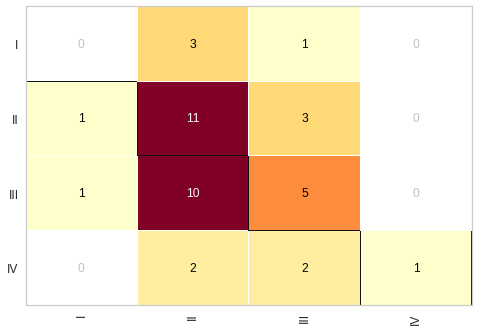

In [148]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_modelc)
cm.fit(X_dados_train, y_dados_train)
cm.score(X_dados_test, y_dados_test)

In [149]:
print(classification_report(y_dados_test, previsoes))

              precision    recall  f1-score   support

           I       0.00      0.00      0.00         4
          II       0.42      0.73      0.54        15
         III       0.45      0.31      0.37        16
          IV       1.00      0.20      0.33         5

    accuracy                           0.42        40
   macro avg       0.47      0.31      0.31        40
weighted avg       0.47      0.42      0.39        40



# **C3-02. RandomForestClassifier**{*Unbalanced*} => 0.575

In [150]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
X_dados

#Onehot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_dados)
X_dados

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)


#Separação dos dados SEM o balanceamento
from sklearn.model_selection import train_test_split

X_dados_train , X_dados_test, y_dados_train, y_dados_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=0)
X_dados_train.shape, X_dados_test.shape
X_random_forest_dados_sb_teste = X_dados_test
y_random_forest_dados_sb_teste = y_dados_test

In [151]:
#RANDOM FOREST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
random_forest_dados_sb = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 200, random_state=0)
random_forest_dados_sb.fit(X_dados_train, y_dados_train)


RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=0)

In [152]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_dados_sb.predict(X_dados_test)
accuracy_score(y_dados_test, previsoes)

0.575

0.575

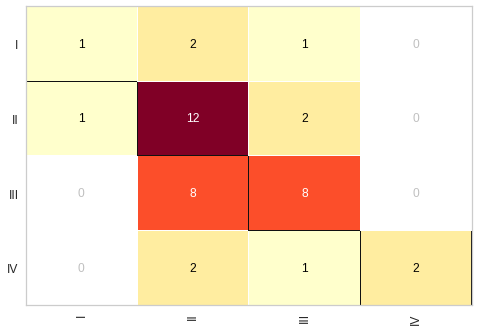

In [153]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_dados_sb)
cm.fit(X_dados_train, y_dados_train)
cm.score(X_dados_test, y_dados_test)

In [154]:
print(classification_report(y_dados_test, previsoes))

              precision    recall  f1-score   support

           I       0.50      0.25      0.33         4
          II       0.50      0.80      0.62        15
         III       0.67      0.50      0.57        16
          IV       1.00      0.40      0.57         5

    accuracy                           0.57        40
   macro avg       0.67      0.49      0.52        40
weighted avg       0.63      0.57      0.56        40




# **C3-03. SVM**{Unbalanced} => *0.575*, liner, 1, 1 | 0.575, sigmoid, 1, 1


In [155]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
X_dados

#Onehot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_dados)
X_dados

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler() #(with_mean=False)
X_dados = scaler_dados.fit_transform(X_dados)


#Separação dos dados SEM o balanceamento
from sklearn.model_selection import train_test_split

X_dados_train , X_dados_test, y_dados_train, y_dados_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=5)
X_dados_train.shape, X_dados_test.shape


((159, 9), (40, 9))

In [156]:
from sklearn.svm import SVC


In [157]:
svm_dados = SVC(kernel='linear', random_state=1, C = 1.0) # 2 -> 4
svm_dados.fit(X_dados_train, y_dados_train)

SVC(kernel='linear', random_state=1)

In [158]:
previsoes = svm_dados.predict(X_dados_test)
previsoes

array(['II', 'II', 'II', 'III', 'III', 'III', 'II', 'II', 'III', 'II',
       'III', 'II', 'II', 'II', 'III', 'II', 'II', 'II', 'II', 'II', 'II',
       'II', 'II', 'III', 'II', 'II', 'II', 'III', 'II', 'II', 'II', 'II',
       'II', 'II', 'II', 'II', 'II', 'III', 'III', 'II'], dtype=object)

In [159]:
y_dados_test

array(['III', 'II', 'III', 'III', 'III', 'III', 'III', 'I', 'II', 'II',
       'IV', 'II', 'II', 'II', 'II', 'III', 'I', 'II', 'III', 'III', 'IV',
       'II', 'II', 'III', 'II', 'II', 'III', 'II', 'II', 'II', 'II',
       'III', 'II', 'III', 'II', 'II', 'IV', 'III', 'III', 'II'],
      dtype=object)

In [160]:
from sklearn.metrics import accuracy_score, classification_report 
#0.575, liner, 1, 1 | 0.425, poly, 1, 1 | #0.475, sigmoid, 1, 1 | 0.425, rbf, 1, 1
accuracy_score(y_dados_test, previsoes)

0.575

0.575

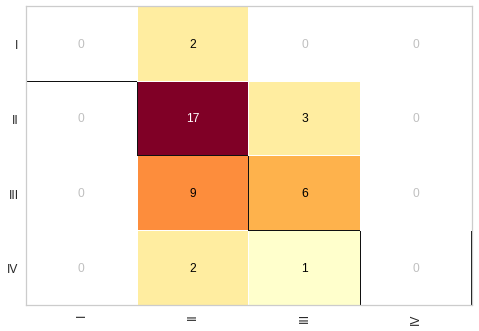

In [161]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_dados)
cm.fit(X_dados_train, y_dados_train)
cm.score(X_dados_test, y_dados_test)

In [162]:
print(classification_report(y_dados_test, previsoes))

              precision    recall  f1-score   support

           I       0.00      0.00      0.00         2
          II       0.57      0.85      0.68        20
         III       0.60      0.40      0.48        15
          IV       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.29      0.31      0.29        40
weighted avg       0.51      0.57      0.52        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



---
# **Cenário 4:**{ Biomarcadores com Idade e Sexo | Dados Não balanceados}
---

# **02. KnnClassifier**{*Balanced*}0.608

((275, 82), (69, 82))

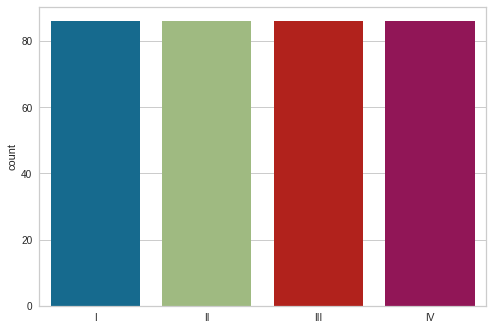

In [163]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
X_dados

# Sobreamostragem com SMOTE
from imblearn.over_sampling import SMOTE
import numpy as np

smote = SMOTE(sampling_strategy='not majority', random_state=3)
X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_over).toarray()

#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split

X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=0)
X_dados_train_over.shape, X_dados_test_over.shape


In [164]:
#Knn Classifier Balanced

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler

In [165]:
knn_modelcb = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p = 2)
knn_modelcb.fit(X_dados_train_over, y_dados_train_over)

KNeighborsClassifier()

In [166]:
previsoes = knn_modelcb.predict(X_dados_test_over)
previsoes

array(['I', 'II', 'II', 'I', 'I', 'IV', 'IV', 'I', 'I', 'I', 'I', 'II',
       'III', 'II', 'I', 'II', 'III', 'I', 'II', 'III', 'IV', 'II', 'I',
       'III', 'I', 'I', 'III', 'I', 'II', 'I', 'I', 'IV', 'III', 'III',
       'III', 'I', 'IV', 'IV', 'II', 'II', 'II', 'III', 'I', 'IV', 'IV',
       'I', 'IV', 'III', 'IV', 'I', 'II', 'II', 'II', 'IV', 'III', 'I',
       'III', 'III', 'I', 'I', 'II', 'II', 'I', 'IV', 'I', 'IV', 'II',
       'I', 'IV'], dtype=object)

In [167]:
y_dados_test_over

array(['III', 'I', 'II', 'I', 'II', 'IV', 'III', 'I', 'I', 'II', 'II',
       'I', 'III', 'IV', 'I', 'II', 'II', 'I', 'II', 'I', 'IV', 'II', 'I',
       'III', 'I', 'I', 'III', 'II', 'II', 'I', 'I', 'IV', 'II', 'II',
       'III', 'IV', 'IV', 'III', 'II', 'II', 'III', 'II', 'II', 'IV',
       'IV', 'I', 'IV', 'IV', 'III', 'I', 'II', 'II', 'III', 'III', 'III',
       'I', 'II', 'IV', 'I', 'I', 'I', 'IV', 'II', 'IV', 'I', 'IV', 'II',
       'I', 'IV'], dtype=object)

In [168]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_dados_test_over, previsoes) # padronização

0.6086956521739131

0.6086956521739131

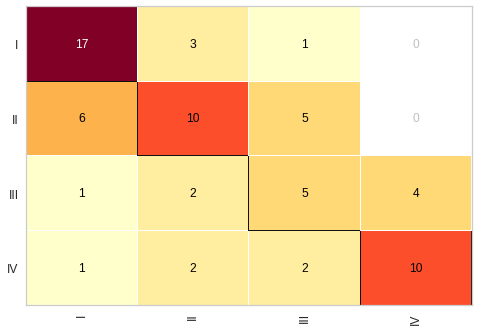

In [169]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_modelcb)
cm.fit(X_dados_train_over, y_dados_train_over)
cm.score(X_dados_test_over, y_dados_test_over)

In [170]:
print(classification_report(y_dados_test_over, previsoes))

              precision    recall  f1-score   support

           I       0.68      0.81      0.74        21
          II       0.59      0.48      0.53        21
         III       0.38      0.42      0.40        12
          IV       0.71      0.67      0.69        15

    accuracy                           0.61        69
   macro avg       0.59      0.59      0.59        69
weighted avg       0.61      0.61      0.60        69



# ***04. RandomForestClassifier***{Balanced} => 0.81

((275, 92), (69, 92))

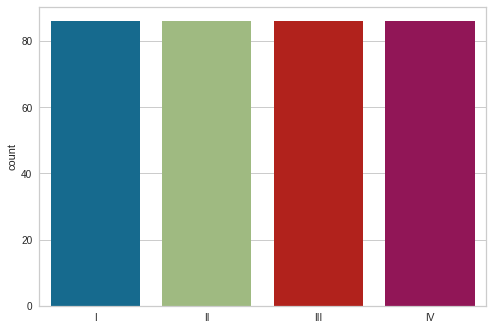

In [171]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
X_dados

# Sobreamostragem com SMOTE

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority', random_state=29)
#9  0.7971014492753623

X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_over).toarray()

#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split

X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=0)
X_dados_train_over.shape, X_dados_test_over.shape


In [172]:
from sklearn.ensemble import RandomForestClassifier #1,6,300,10 -->0.681 | 1,5,200, 17 -->0.8115942028985508

random_forest_dados = RandomForestClassifier(criterion = 'entropy', min_samples_leaf =  1, min_samples_split = 5, n_estimators = 200, random_state = 17 )
random_forest_dados.fit(X_dados_train_over, y_dados_train_over)

RandomForestClassifier(criterion='entropy', min_samples_split=5,
                       n_estimators=200, random_state=17)

In [173]:
from sklearn.metrics import accuracy_score, classification_report
previsoes = random_forest_dados.predict(X_dados_test_over)
accuracy_score(y_dados_test_over, previsoes)

0.8115942028985508

0.8115942028985508

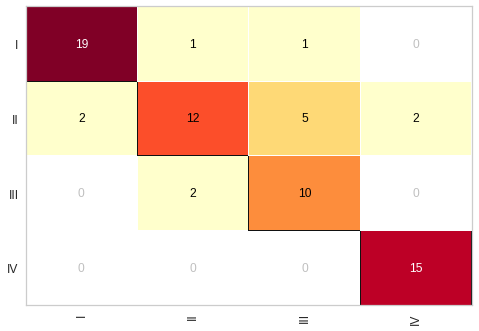

In [174]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(random_forest_dados)
cm.fit(X_dados_train_over, y_dados_train_over)
cm.score(X_dados_test_over, y_dados_test_over)

In [175]:
print(classification_report(y_dados_test_over, previsoes))

              precision    recall  f1-score   support

           I       0.90      0.90      0.90        21
          II       0.80      0.57      0.67        21
         III       0.62      0.83      0.71        12
          IV       0.88      1.00      0.94        15

    accuracy                           0.81        69
   macro avg       0.80      0.83      0.81        69
weighted avg       0.82      0.81      0.81        69



In [176]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
X_dados

#Onehot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_dados)
X_dados

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)


#Separação dos dados SEM o balanceamento
from sklearn.model_selection import train_test_split

X_dados_train , X_dados_test, y_dados_train, y_dados_test = train_test_split(X_dados, y_dados, test_size=0.2, random_state=5)
X_dados_train.shape, X_dados_test.shape


((159, 9), (40, 9))

In [177]:
from sklearn.svm import SVC


In [178]:
svm_dados = SVC(kernel='linear', random_state=1, C = 1.0) # 2 -> 4
svm_dados.fit(X_dados_train, y_dados_train)

SVC(kernel='linear', random_state=1)

In [179]:
previsoes = svm_dados.predict(X_dados_test)
previsoes

array(['II', 'II', 'II', 'III', 'III', 'III', 'II', 'II', 'III', 'II',
       'III', 'II', 'II', 'II', 'III', 'II', 'II', 'II', 'II', 'II', 'II',
       'II', 'II', 'III', 'II', 'II', 'II', 'III', 'II', 'II', 'II', 'II',
       'II', 'II', 'II', 'II', 'II', 'III', 'III', 'II'], dtype=object)

In [180]:
y_dados_test

array(['III', 'II', 'III', 'III', 'III', 'III', 'III', 'I', 'II', 'II',
       'IV', 'II', 'II', 'II', 'II', 'III', 'I', 'II', 'III', 'III', 'IV',
       'II', 'II', 'III', 'II', 'II', 'III', 'II', 'II', 'II', 'II',
       'III', 'II', 'III', 'II', 'II', 'IV', 'III', 'III', 'II'],
      dtype=object)

In [181]:
from sklearn.metrics import accuracy_score, classification_report 
#0.575, liner, 1, 1 | 0.425, poly, 1, 1 | #0.475, sigmoid, 1, 1 | 0.425, rbf, 1, 1
accuracy_score(y_dados_test, previsoes)

0.575

0.575

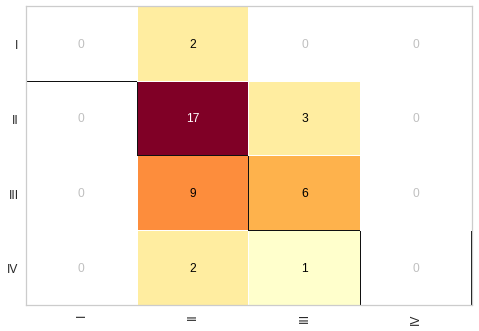

In [182]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_dados)
cm.fit(X_dados_train, y_dados_train)
cm.score(X_dados_test, y_dados_test)

In [183]:
print(classification_report(y_dados_test, previsoes))

              precision    recall  f1-score   support

           I       0.00      0.00      0.00         2
          II       0.57      0.85      0.68        20
         III       0.60      0.40      0.48        15
          IV       0.00      0.00      0.00         3

    accuracy                           0.57        40
   macro avg       0.29      0.31      0.29        40
weighted avg       0.51      0.57      0.52        40



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# **06. SVM**{Balanced} => 0.579, linear, 0, 10 |

((array(['I', 'II', 'III', 'IV'], dtype=object), array([16, 86, 76, 21])),
 (array(['I', 'II', 'III', 'IV'], dtype=object), array([86, 86, 86, 86])))

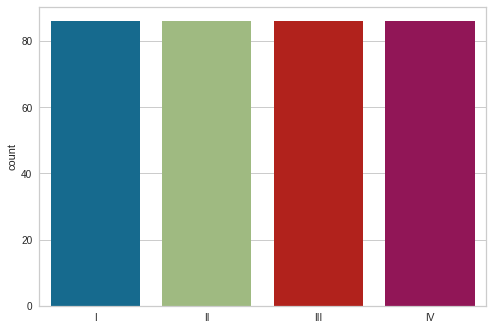

In [184]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd


# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])
X_dados

# Sobreamostragem com SMOTE

from imblearn.over_sampling import SMOTE
import numpy as np

lista = []
count = 1

smote = SMOTE(sampling_strategy='not majority', random_state=16)
#2 - 47
X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape

np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_over).toarray()

#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_dados)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split

X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=1)
X_dados_train_over.shape, X_dados_test_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)


In [185]:
from sklearn.svm import SVC

In [186]:
svm_dados = SVC(kernel='linear', random_state=0, C = 10.0) # 2 -> 4
svm_dados.fit(X_dados_train_over, y_dados_train_over)

SVC(C=10.0, kernel='linear', random_state=0)

In [187]:
previsoes = svm_dados.predict(X_dados_test_over)
previsoes

array(['IV', 'IV', 'IV', 'III', 'II', 'I', 'I', 'II', 'IV', 'I', 'I',
       'IV', 'IV', 'I', 'II', 'II', 'III', 'III', 'II', 'II', 'I', 'I',
       'IV', 'IV', 'III', 'I', 'IV', 'II', 'IV', 'II', 'I', 'II', 'I',
       'III', 'IV', 'III', 'III', 'IV', 'III', 'II', 'II', 'IV', 'II',
       'I', 'III', 'III', 'II', 'IV', 'IV', 'III', 'III', 'III', 'I',
       'II', 'III', 'I', 'IV', 'IV', 'II', 'I', 'I', 'II', 'IV', 'IV',
       'II', 'I', 'II', 'I', 'II'], dtype=object)

In [188]:
y_dados_test_over

array(['IV', 'IV', 'IV', 'III', 'IV', 'I', 'III', 'I', 'III', 'I', 'III',
       'I', 'IV', 'III', 'II', 'II', 'I', 'I', 'II', 'II', 'I', 'I', 'IV',
       'IV', 'II', 'I', 'I', 'III', 'IV', 'II', 'III', 'III', 'I', 'III',
       'III', 'III', 'III', 'II', 'IV', 'II', 'II', 'III', 'III', 'I',
       'IV', 'I', 'III', 'IV', 'IV', 'III', 'III', 'IV', 'III', 'III',
       'IV', 'I', 'IV', 'II', 'II', 'I', 'III', 'II', 'IV', 'IV', 'II',
       'II', 'II', 'I', 'II'], dtype=object)

In [189]:
from sklearn.metrics import accuracy_score, classification_report 
#0.475, liner, 1, 1 | 0.425, poly, 1, 1 | #0.475, sigmoid, 1, 1 | 0.425, rbf, 1, 1
#0.434, rbf 1, 2 |0.521 linear, 0, 10

accuracy_score(y_dados_test_over, previsoes)

0.5797101449275363

0.5797101449275363

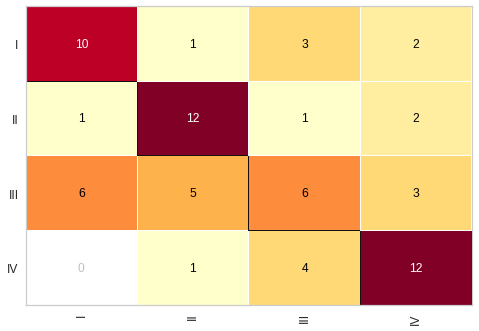

In [190]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_dados)
cm.fit(X_dados_train_over, y_dados_train_over)
cm.score(X_dados_test_over, y_dados_test_over)

In [191]:
print(classification_report(y_dados_test_over, previsoes))

              precision    recall  f1-score   support

           I       0.59      0.62      0.61        16
          II       0.63      0.75      0.69        16
         III       0.43      0.30      0.35        20
          IV       0.63      0.71      0.67        17

    accuracy                           0.58        69
   macro avg       0.57      0.60      0.58        69
weighted avg       0.56      0.58      0.57        69



# **07. Agrupamento Hierarquico**

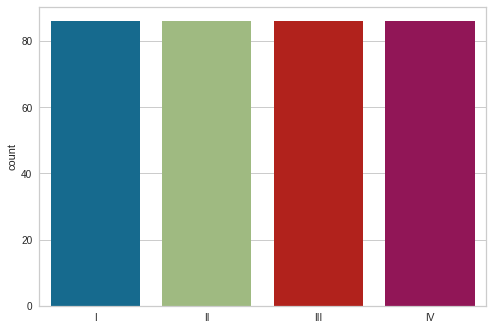

In [192]:
#PREPARAR OS DADOS ==> Importar e tratar os dados
import pandas as pd

# Importando o Arquivo
dados = pd.read_csv("dataMODIFICADOv10F.csv", sep=",")

#Transformando os nulos para 0
dados = dados.fillna(1, inplace= False) 

#Separando as variaveis de interesse | sex	age	LYVE1	REG1B	TFF1	creatinine	plasma_CA19_9	REG1A	
X_dados = dados.iloc[:,5:13].values
X_dados 

#Separando a classe alvo | stage2
y_dados = dados.iloc[:,13].values
y_dados

# Tratando as colunas que São rotulos | sex
from sklearn.preprocessing import LabelEncoder

label_encoder_sex = LabelEncoder()
X_dados[:,0] = label_encoder_sex.fit_transform(X_dados[:,0])

# Sobreamostragem com SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='not majority')
X_over, y_over = smote.fit_resample(X_dados, y_dados)

#y_over.shape, X_over.shape
np.unique(y_dados, return_counts = True), np.unique(y_over, return_counts = True)

import seaborn as sns
sns.countplot(x = y_over);

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
onehotencorder = ColumnTransformer(transformers=[("OneHot", OneHotEncoder(), [0])],remainder='passthrough')
X_dados = onehotencorder.fit_transform(X_over).toarray()

#X_dados, X_dados.shape

#ESCALONAMENTO DE ATRIBUTOS
from sklearn.preprocessing import StandardScaler
scaler_dados = StandardScaler()
X_dados = scaler_dados.fit_transform(X_over)
X_dados

#Separação dos dados BALANCEADOS
from sklearn.model_selection import train_test_split
X_dados_train_over, X_dados_test_over, y_dados_train_over, y_dados_test_over = train_test_split(X_dados, y_over, test_size=0.2, random_state=0)


In [193]:
#Reduzir as dimensões de dimensões.
from sklearn.decomposition import PCA
import plotly.express as px


In [194]:
pca = PCA(n_components=2)

In [195]:
X_dados_train_pca = pca.fit_transform(X_dados_train_over)
X_dados_test_pca = pca.transform(X_dados_test_over)

In [196]:
X_dados_train_pca.shape, X_dados_test_pca.shape,

((275, 2), (69, 2))

In [197]:
#X_dados_train_pca

In [198]:
pca.explained_variance_ratio_

array([0.31860026, 0.15550037])

In [199]:
pca.explained_variance_ratio_.sum()

0.47410062534549513

In [200]:
grafico = px.scatter(x = X_dados_train_pca[:,0], y= X_dados_train_pca[:,1]) 
grafico.show()

In [201]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

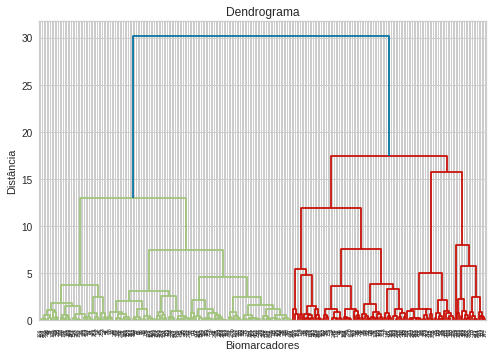

In [202]:
dendrograma = dendrogram(linkage(X_dados_train_pca, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Biomarcadores')
plt.ylabel('Distância');

In [203]:
from sklearn.cluster import AgglomerativeClustering

In [204]:
hc_dados_agrup = AgglomerativeClustering(n_clusters=2, linkage='ward', affinity='euclidean')
rotulos = hc_dados_agrup.fit_predict(X_dados_train_pca)

In [205]:
grafico = px.scatter(x = X_dados_train_pca[:,0], y = X_dados_train_pca[:,1], color = rotulos)
grafico.show()